
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [8]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization.
from matplotlib import pyplot as plt # used for visualization.
import pylab #Directly call functions and methods of Matplotlib and NumPy to perform scientific calculations and data visualization more conveniently.
!pip install pingouin 
import pingouin as pg #Perform data analysis and statistical modeling.

df_mh = pd.read_csv(r'C:\Users\yd180\Desktop\A1_analysing_data\data for A1\MillerHadenData.csv')



   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   ---------------------------------------- 198.9/198.9 kB 6.1 MB/s eta 0:00:00


In [13]:
# Q1a (code):
# Display first few rows of the dataframe
data = pd.read_csv(r'C:\Users\yd180\Desktop\A1_analysing_data\data for A1\MillerHadenData.csv', header=0)
data.head()


,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [15]:
# Check data types and information
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [16]:
# Q1b (code):

# Check for missing values
#source：https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
missing_values = data.isnull().sum()

# Display the number of missing values in each column
print("Missing values count:\n", missing_values)

# Check if there are any missing values
if missing_values.sum() > 0:
    print("There are missing values in the data.")
else:
    print("There are no missing values in the data.")

Missing values count:
 Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
There are no missing values in the data.


In [21]:
# Check whether there is a data point for each participant on both variables

# Count the number of missing values in the 'Abil' column
missing_values_abil = df_mh['Abil'].isnull().sum()
# Count the number of missing values in the 'IQ' column
missing_values_iq = df_mh['IQ'].isnull().sum()

# Check if the number of missing values in both columns 'Abil' and 'IQ' is zero
# If the number of missing values in both columns 'Abil' and 'IQ' is zero, it means that each participant has data points for both variables.
if missing_values_abil == missing_values_iq == 0:
    print("There is a data point for each participant on both variables.")

# If the number of missing values in the 'Abil' and 'IQ' columns is non-zero, it means that some participants are missing data points for some variables
else:
    print("There are missing data points for some participants.")

There is a data point for each participant on both variables.


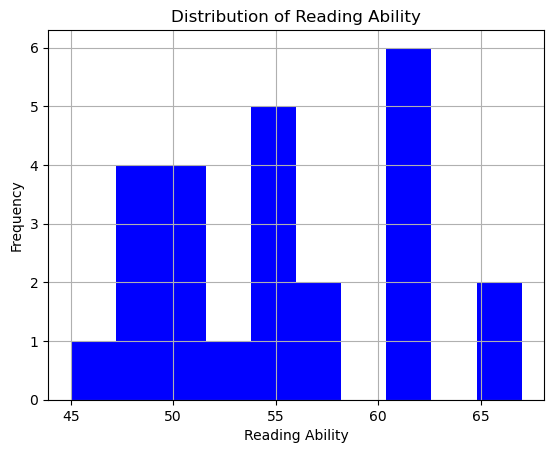

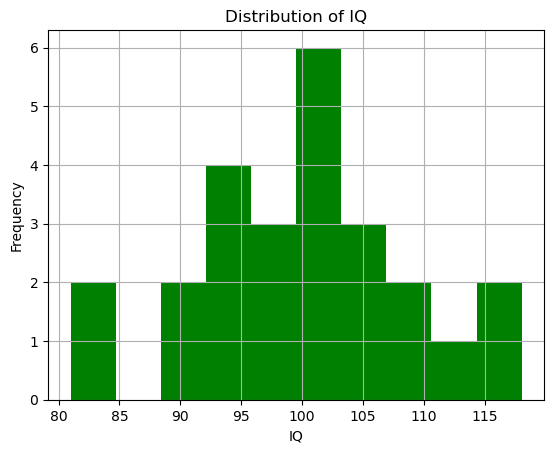

In [37]:
# Q1c (code):
# Check data distribution

# Draw a histogram of reading ability, set to blue
df_mh['Abil'].hist(color='blue')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Ability')

plt.show()

# Draw a histogram of IQ
df_mh['IQ'].hist(color='green')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.title('Distribution of IQ')

plt.show()

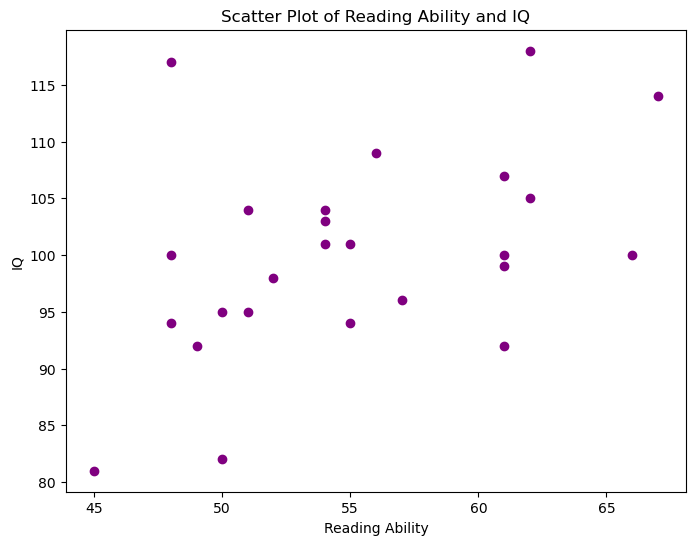

In [44]:
# Q1d (code):
# Scatter plot

#Create a scatter plot and set the graphic size
plt.figure(figsize=(8, 6))
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='purple')

# Add tags and titles
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.title('Scatter Plot of Reading Ability and IQ')
# Generate graphics
plt.show()

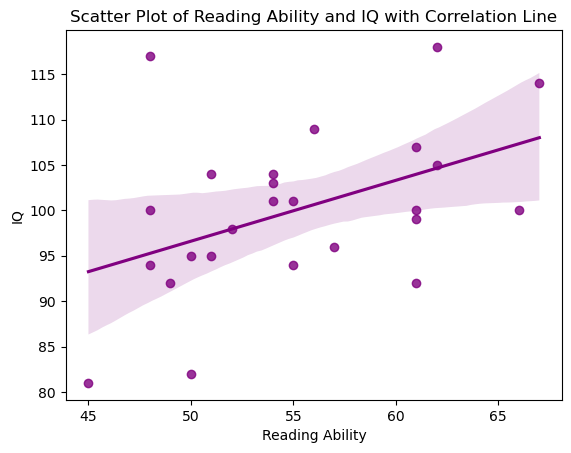

In [54]:
# Q1e (code):
# Correlation line

#Use the regplot() function to create a scatterplot and plot the correlation line between reading ability and IQ
plot_corr_sns = sns.regplot(x='Abil', y='IQ', data=df_mh, color='purple')
# Add tags and titles
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.title('Scatter Plot of Reading Ability and IQ with Correlation Line')
# Generate graphics
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):

Because the Pearson correlation coefficient applies to continuous variables with a linear relationship and a bivariate normal distribution. According to the image results of Question 1, it can be seen that "reading ability" and "IQ" are normally distributed and have a linear relationship, so the Pearson correlation coefficient test should be used.

In [57]:
# Q2b (code):
# Calculate the Pearson correlation coefficient between reading ability and IQ using the corr() function
corr_Reading_ability_IQ = pg.corr(df_mh['Abil'], df_mh['IQ'])
print(corr_Reading_ability_IQ)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


# Q2c (answer with words):

It can be seen from the results that the correlation coefficient r=0.45117, which means that there is a positive correlation between reading ability and IQ. In other words, the higher the reading ability, the more it increases, and the IQ will also increase. p-val =0.023593, lower than 0.05, which also proves the correlation between reading ability and IQ. BF10=2.804. Although this is not strong evidence, it still proves the correlation between variables. Overall, there is a positive correlation between the two variables, but the numerical correlation strength according to the results is a moderate correlation.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
H0:The values of the two variables are independent and will not affect each other. There was no association between reading ability and weekly reading time at home.


H1：The distributions between the two variables are not independent. There is a significant association between reading ability and weekly reading time at home.

In [60]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##Used to perform chi-square tests,  test whether there is an association between two categorical variables.
import numpy as np ###For array operations

# Define the rounded average for Reading Ability and Home
rounded_avg_abil = df_mh['Abil'].mean().round()
rounded_avg_home = df_mh['Home'].mean().round()

#Use the np.where() function to create a new column based on conditional judgment, and set the elements that meet the condition to the specified value.
#source:https://sparkbyexamples.com/pandas/pandas-create-conditional-column-in-dataframe/#google_vignette
# Create the Rank_Abil column
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] <= rounded_avg_abil, 'Low', 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = np.where(df_mh['Home'] <= rounded_avg_home, 'Infrequent', 'Frequent')
df_mh

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent
5,6,62,105,161,407,High,Frequent
6,7,61,92,138,463,High,Frequent
7,8,55,101,119,717,Low,Infrequent
8,9,62,118,155,643,High,Frequent
9,10,61,99,121,674,High,Infrequent


In [61]:
# Q3c (code):
# Construct Contingency Matrix
contingency_table = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Show contingency table
print("Contingency Matrix:")
print(contingency_table)

Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [62]:
# Q3d (code):
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show test results
print("Chi-square test result:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square test result:
Chi-square statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):

Chi-square statistic: 6.5, which means that the difference between the observed frequency and the expected frequency is significant.According to the above results, and the p value is less than 0.05. Therefore, the null hypothesis is rejected, which means that these numerical results fully prove that there is a relationship between reading ability and weekly reading time at home, and this relationship is not accidental.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [64]:

import pandas as pd # used for data manipulation and analysis
from scipy import stats ##Perform various statistical analysis
import numpy as np ## For Numerical calculations and array manipulations.
import matplotlib.pyplot as plt ## used for visualization 
import seaborn as sns ##Create statistical data visualization charts

# Load the data
df_evaluators = pd.read_csv(r'C:\Users\yd180\Desktop\A1_analysing_data\data for A1\evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [66]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

# show mean and standard deviation for age
print("Mean age of evaluators:", mean_age)
print("Standard deviation of age of evaluators:", std_age)

Mean age of evaluators: 30.852941176470587
Standard deviation of age of evaluators: 6.238358141327351


In [70]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
#Filter out the rows with male gender and sum them
male_count = (df_evaluators['sex'] == 1).sum()
#Filter out the rows with female gender and sum them
female_count = (df_evaluators['sex'] == 2).sum()

# Show the number of male and female evaluators
print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [71]:
# Load ratings data
df_ratings = pd.read_csv(r"C:\Users\yd180\Desktop\A1_analysing_data\data for A1\ratings.csv")
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [78]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_ratings_filtered = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
df_intellect_rating = df_ratings_filtered.groupby('eval_id')['Rating'].mean()
df_intellect_rating = df_intellect_rating.reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
df_intellect_rating['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
df_impression_hire = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([df_intellect_rating, df_impression_hire])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
#source：https://stackoverflow.com/questions/13636592/how-to-sort-a-pandas-dataframe-according-to-multiple-criteria
ratings2.sort_values(by=['eval_id', 'Category'], inplace=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
# Null hypothesis:
There were no significant differences in overall ratings (intelligence, impression, and employability) between evaluators who listened to the resume pitch and those who read the resume pitch. In other words, the mean overall ratings of the two groups of evaluators were equal, so the mode of presentation (listening or reading) did not affect the evaluators' ratings.

# Alternative hypothesis:
There were significant differences in overall ratings (intelligence, impression, and employability) between evaluators who listened to the resume pitch and those who read the resume pitch. That is, the average overall rating of one group of evaluators is not equal to the average overall rating of another group

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
We should choose the two tail t-test because we do not have a specific hypothesis direction or a clear prediction of whether one group will score higher than the other. The two tail t-test allows us to detect differences in any direction .

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independent variable is the method of presenting the resume pitch to the evaluator, which has two levels: listening and reading.
The dependent variable is the overall rating given by the evaluator. This may include ratings of intelligence, impression, and employability.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [90]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # for Shapiro-Wilk test and Levene's test and independent t-tests 

# Extract intellect data for listened and read conditions separately
intellect_listened_ratings = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read_ratings = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']

# Extract impression data for listened and read conditions separately
impression_listened_ratings = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read_ratings = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']

# Extract hire data for listened and read conditions separately
hire_listened_ratings = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read_ratings = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']

# Display descriptive statistics for listened condition
print("Descriptive statistics for Intellect ratings (Listened):")
print(intellect_listened_ratings.describe())

print("\nDescriptive statistics for Impression ratings (Listened):")
print(impression_listened_ratings.describe())

print("\nDescriptive statistics for Hire ratings (Listened):")
print(hire_listened_ratings.describe())

# Display descriptive statistics for read condition
print("\nDescriptive statistics for Intellect ratings (Read):")
print(intellect_read_ratings.describe())

print("\nDescriptive statistics for Impression ratings (Read):")
print(impression_read_ratings.describe())

print("\nDescriptive statistics for Hire ratings (Read):")
print(hire_read_ratings.describe())

Descriptive statistics for Intellect ratings (Listened):
count    21.000000
mean      5.634921
std       1.608674
min       2.333333
25%       5.000000
50%       5.666667
75%       6.000000
max       9.000000
Name: Rating, dtype: float64

Descriptive statistics for Impression ratings (Listened):
count    21.000000
mean      5.968254
std       1.917477
min       2.333333
25%       4.666667
50%       6.666667
75%       7.333333
max       8.666667
Name: Rating, dtype: float64

Descriptive statistics for Hire ratings (Listened):
count    21.000000
mean      4.714286
std       2.261479
min       0.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       8.000000
Name: Rating, dtype: float64

Descriptive statistics for Intellect ratings (Read):
count    18.000000
mean      3.648148
std       1.911343
min       0.666667
25%       2.083333
50%       3.666667
75%       4.666667
max       7.000000
Name: Rating, dtype: float64

Descriptive statistics for Impression ratings (Read)

In [91]:
# Perform Shapiro-Wilk test for normality on intellect ratings
shapiro_intellect = shapiro(intellect_ratings)
print("Shapiro-Wilk Test for Intellect Ratings:")
print(f"Test Statistic: {shapiro_intellect.statistic}")
print(f"P-value: {shapiro_intellect.pvalue}")

# Perform Shapiro-Wilk test for normality on impression ratings
shapiro_impression = shapiro(impression_ratings)
print("\nShapiro-Wilk Test for Impression Ratings:")
print(f"Test Statistic: {shapiro_impression.statistic}")
print(f"P-value: {shapiro_impression.pvalue}")

# Perform Shapiro-Wilk test for normality on hire ratings
shapiro_hire = shapiro(hire_ratings)
print("\nShapiro-Wilk Test for Hire Ratings:")
print(f"Test Statistic: {shapiro_hire.statistic}")
print(f"P-value: {shapiro_hire.pvalue}")

Shapiro-Wilk Test for Intellect Ratings:
Test Statistic: 0.9747602939605713
P-value: 0.5182666182518005

Shapiro-Wilk Test for Impression Ratings:
Test Statistic: 0.9595587849617004
P-value: 0.17238670587539673

Shapiro-Wilk Test for Hire Ratings:
Test Statistic: 0.9427909851074219
P-value: 0.04710369557142258


In [98]:
# Test for homogeneity of variances (Levene's test)
from scipy.stats import levene

# Define a function to perform Levene's test
def test_homogeneity_of_variances(data, category):
    # Group data extraction based on conditions
    listened_ratings = data[data['condition'] == 'listened']['Rating']
    read_ratings = data[data['condition'] == 'read']['Rating']
    
    # Perform Levene's test
    stat, p_value = levene(listened_ratings, read_ratings)
    # Display rating categories
    print(f"Levene's test for {category.capitalize()} ratings:")  
    print(f"Test Statistic: {stat}") 
    print(f"P-value: {p_value}")  
    print()

# Perform Levene's test on each category
test_homogeneity_of_variances(ratings2[ratings2['Category'] == 'intellect'], 'intellect')  
test_homogeneity_of_variances(ratings2[ratings2['Category'] == 'impression'], 'impression')  
test_homogeneity_of_variances(ratings2[ratings2['Category'] == 'hire'], 'hire')  

Levene's test for Intellect ratings:
Test Statistic: 0.8980185752566812
P-value: 0.34946205893248505

Levene's test for Impression ratings:
Test Statistic: 0.39045326236607025
P-value: 0.5358960150374064

Levene's test for Hire ratings:
Test Statistic: 0.10663746145199855
P-value: 0.7458453933447955



In [99]:
# Independent t-tests

def independent_t_test(data, category):
    # Group data extraction based on conditions
    listened_ratings = data[data['condition'] == 'listened']['Rating']
    read_ratings = data[data['condition'] == 'read']['Rating']
    
    stat, p_value = ttest_ind(listened_ratings, read_ratings)
    print(f"Independent t-test for {category.capitalize()} ratings:") 
    print(f"t-statistic: {stat}")  
    print(f"P-value: {p_value}")  
    print()

# Perform  Independent t-tests on each category
independent_t_test(ratings2[ratings2['Category'] == 'intellect'], 'intellect')  
independent_t_test(ratings2[ratings2['Category'] == 'impression'], 'impression')  
independent_t_test(ratings2[ratings2['Category'] == 'hire'], 'hire') 

Independent t-test for Intellect ratings:
t-statistic: 3.5259329220482414
P-value: 0.0011444414996286821

Independent t-test for Impression ratings:
t-statistic: 2.850766179025179
P-value: 0.007091060616710596

Independent t-test for Hire ratings:
t-statistic: 2.620100218173143
P-value: 0.012674511839824125



#Q7b (answer in words):

Descriptive Statistics

Use these descriptive statistics to gain insight into the central tendency, variability, and distribution of ratings for each category and condition. These statistics were used to identify significant differences between the listening and reading conditions. For example, in the listening condition, the average rating of the candidate's intelligence (5.63) was higher than the average rating of the candidate's intelligence in the reading condition (3.65). It could mean that listening to resumes appears to have a positive impact on evaluators' intelligence assessments, whereas reading resumes may lead to lower rated intelligence impressions. In terms of impression rating, the standard deviation of the ratings is higher in the listening condition, possibly because the listening method is more emotionally resonant or easier to attract attention.

Shapiro-Wilk test

Regarding intelligence rating, the P value corresponding to the Shapiro-Wilk test result is 0.518, which is much greater than 0.05. Therefore, the intelligence rating data conforms to the normal distribution under both listening and reading conditions. Regarding the impression rating, the corresponding P value is also much larger than 0.05, so the conclusion is the same. However, the corresponding p value for hire rating data is 0.047<0.05, which means that it does not obey the normal distribution under listening and reading conditions. Based on what can be obtained, intelligence and impression rating data can be analyzed based on the statistical method of normal distribution. For hire rating data, it does not meet the assumption of normal distribution, so we should choose other methods that do not make assumptions to avoid analysis errors.

 Levene's test

Levene's test is used to test whether the sample variances of each group are equal. In the intelligence rating, impression rating, and hire rating, the sample variances under the two conditions of listening and reading are not significantly different.

Independent t-tests

There are significant differences in intelligence rating (P value=0.0011), impression rating (P value=0.0071), and hire rating (P value=0.00127) under the same listening and reading conditions. That is to say, the difference between the two conditions is not randomly caused by sampling errors or other reasons, but is real. This can provide more accurate evidence for selecting a better way to present resumes during recruitment.